In [1]:
#import necessary packages: pandas, matplotlib, seaborn, and sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#change to seaborn's color style
sns.set(color_codes = True)

#remove output warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
#source: https://www.kaggle.com/datasets/travistyler/dnd-5e-monster-manual-stats
dnd = pd.read_csv('https://raw.githubusercontent.com/lwpondscum/CIS9660_Lab_2/main/aidedd_blocks2.csv')

In [3]:
#creates a data frame of only the relevant categories
dnd_mod = dnd[['size', 'ac','hp','cr','speed','swim','fly','climb', 'burrow', 'passive_perception', 'darkvision',
              'truesight', 'tremorsense', 'blindsight', 'strength', 'dex', 'con', 'intel', 'wis','cha', 'legendary']]

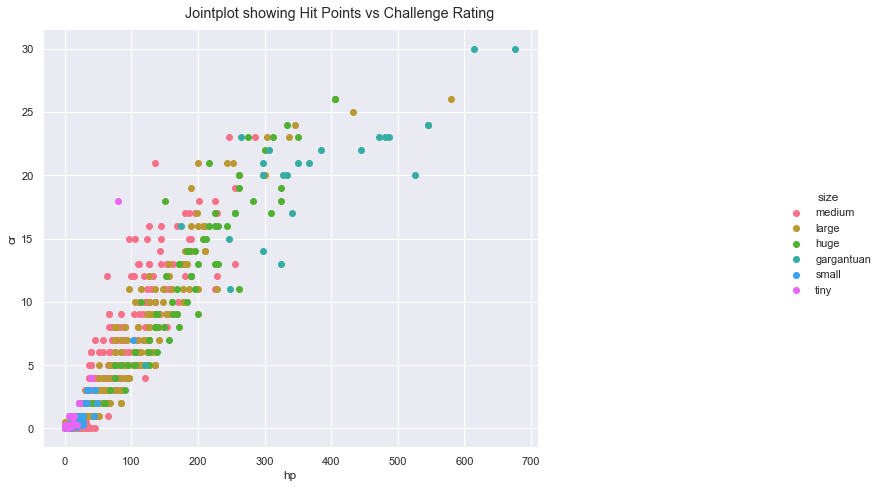

In [4]:
#creates a joint plot of hp vs cr colored by size
rp = sns.FacetGrid(dnd_mod, hue = 'size', palette = 'husl').map(plt.scatter, 'hp', 'cr').add_legend()
rp.fig.suptitle('Jointplot showing Hit Points vs Challenge Rating')
plt.gcf().set_size_inches(15, 8)
plt.show()

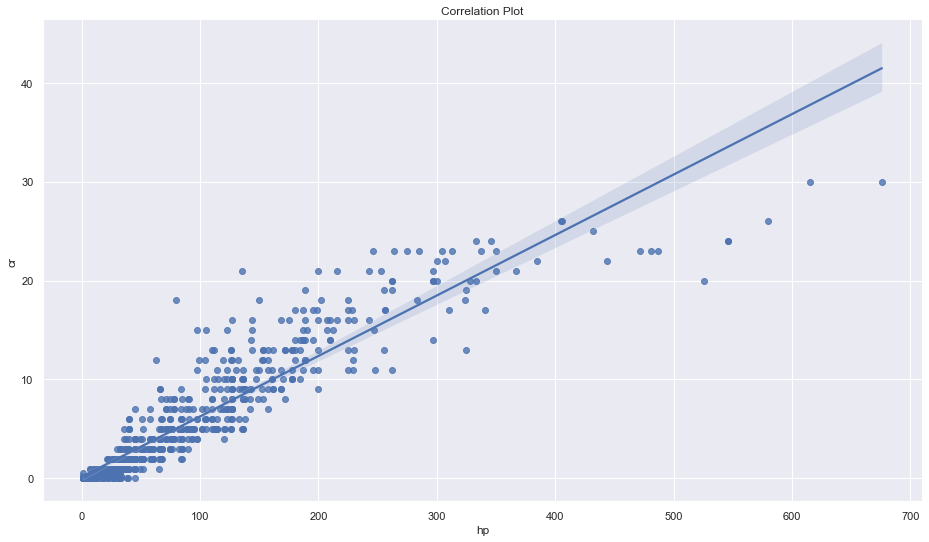

In [5]:
#creates a lineplot of hp vs cr with line of best fit
sns.lmplot(x = 'hp', y = 'cr', data = dnd_mod).set(title = "Correlation Plot")
plt.gcf().set_size_inches(15, 8)
plt.show()

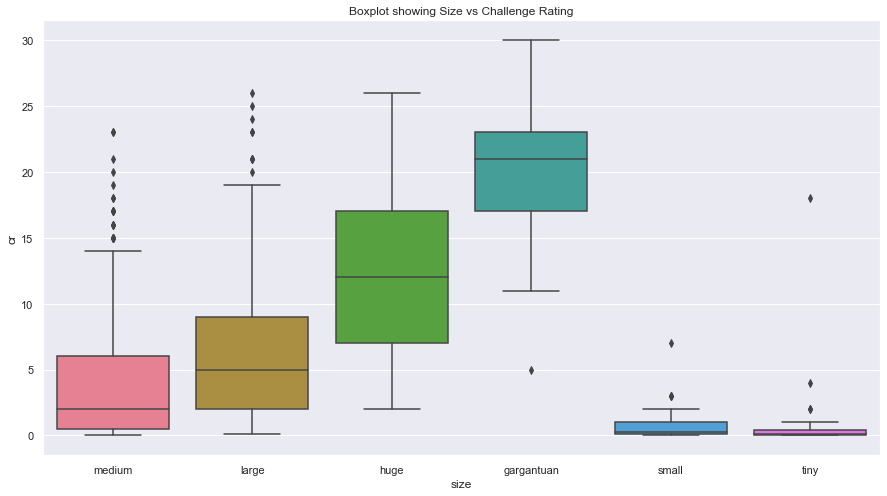

In [6]:
#creates a boxplot of cr sorted by size
sns.boxplot(x='size', y='cr', palette='husl', data=dnd_mod).set(title='Boxplot showing Size vs Challenge Rating')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [7]:
#encodes the categorical variable of size and drops size from the data frame
dnd_size_encoding = pd.get_dummies(dnd_mod['size'])
dnd_mod = dnd_mod.drop('size', axis = 1)

In [8]:
#joins the encoded data with the data frame
dnd_mod = dnd_mod.join(dnd_size_encoding)

In [9]:
#creates a correlation matrix for the dataset
dnd_mod.corr()

,ac,hp,cr,speed,swim,fly,climb,burrow,passive_perception,darkvision,...,intel,wis,cha,legendary,gargantuan,huge,large,medium,small,tiny
ac,1.000000,0.668608,0.707400,0.259286,0.074267,0.334696,0.005731,0.203993,0.551881,0.299636,...,0.485368,0.473870,0.571148,0.353649,0.312194,0.181649,0.013433,-0.094169,-0.149064,-0.129863
hp,0.668608,1.000000,0.926309,0.264551,0.185713,0.365880,-0.005170,0.212331,0.638400,0.245644,...,0.451116,0.522324,0.595869,0.489883,0.565473,0.338724,0.079700,-0.276664,-0.204292,-0.192762
cr,0.707400,0.926309,1.000000,0.224442,0.125081,0.354818,-0.026808,0.158885,0.679880,0.249490,...,0.562895,0.613467,0.671867,0.484703,0.426052,0.337630,0.062006,-0.216207,-0.212313,-0.171166
speed,0.259286,0.264551,0.224442,1.000000,-0.053137,-0.015583,0.091807,0.130051,0.232996,0.043879,...,0.127669,0.201094,0.218002,0.077730,0.089606,0.186835,0.111841,-0.102210,-0.099320,-0.191990
swim,0.074267,0.185713,0.125081,-0.053137,1.000000,0.058982,-0.092373,0.005631,0.132180,0.067542,...,-0.005198,0.059840,0.060409,0.136563,0.202050,0.148142,0.019304,-0.129068,-0.077175,-0.011902
fly,0.334696,0.365880,0.354818,-0.015583,0.058982,1.000000,-0.024390,0.154691,0.439707,0.221654,...,0.251801,0.311987,0.396428,0.388901,0.271101,0.131751,0.086498,-0.248939,-0.042079,0.052469
climb,0.005731,-0.005170,-0.026808,0.091807,-0.092373,-0.024390,1.000000,0.034427,0.065169,0.073030,...,-0.083005,-0.011057,-0.084656,0.020394,0.004943,0.032895,0.063407,-0.102577,0.053051,-0.001443
burrow,0.203993,0.212331,0.158885,0.130051,0.005631,0.154691,0.034427,1.000000,0.150771,0.141351,...,-0.004633,0.009428,0.050288,0.211345,0.242910,0.096360,0.021524,-0.138155,-0.012643,-0.036723
passive_perception,0.551881,0.638400,0.679880,0.232996,0.132180,0.439707,0.065169,0.150771,1.000000,0.259168,...,0.570434,0.728135,0.650523,0.500810,0.285550,0.260326,0.008772,-0.127662,-0.165325,-0.106335
darkvision,0.299636,0.245644,0.249490,0.043879,0.067542,0.221654,0.073030,0.141351,0.259168,1.000000,...,0.213756,0.094393,0.232377,0.190643,0.135111,-0.056021,0.069594,-0.062296,0.026736,-0.064651


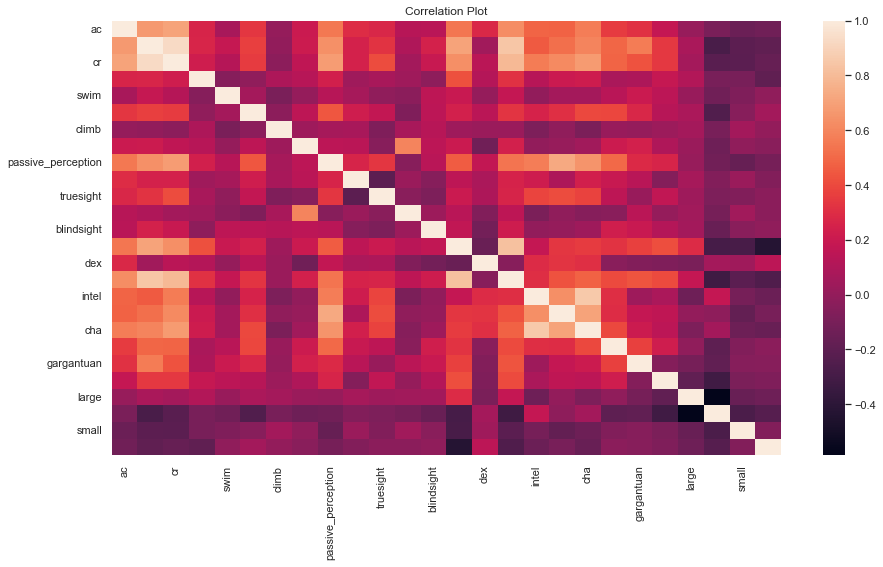

In [10]:
#creates heatmap for dataset
sns.heatmap(dnd_mod.corr())
plt.title('Correlation Plot')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [11]:
dnd_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ac                  762 non-null    float64
 1   hp                  762 non-null    int64  
 2   cr                  762 non-null    float64
 3   speed               762 non-null    int64  
 4   swim                762 non-null    int64  
 5   fly                 762 non-null    int64  
 6   climb               762 non-null    int64  
 7   burrow              762 non-null    int64  
 8   passive_perception  762 non-null    int64  
 9   darkvision          762 non-null    int64  
 10  truesight           762 non-null    int64  
 11  tremorsense         762 non-null    int64  
 12  blindsight          762 non-null    int64  
 13  strength            762 non-null    int64  
 14  dex                 762 non-null    int64  
 15  con                 762 non-null    int64  
 16  intel   

In [12]:
#creates training and test sets of .70 to .30 ratio
X = dnd_mod.drop(['cr'], axis = 1)
y = dnd_mod['cr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 87)

In [13]:
#creates linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [14]:
#test model
y_pred = LR.predict(X_test)

In [15]:
#prints R-squared
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.8778174786368005


In [16]:
#prints MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 5.127717073191307


In [17]:
#prints RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 2.264446306095887


In [18]:
#prints MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 1.396911759580683
